Analysis 1: Sentiment Analysis. 
------------------------------------------------------------------------------------------
Polarity analysis takes into account the amount of positive or negative terms that appear in a given sentence. It is useful to some extent, since it does a good job of structuring data sets


Source: https://www.kaggle.com/datasets/datasnaek/youtube?select=UScomments.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data analysis\youtube Case study\UScomments.csv', error_bad_lines = False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
comments.head()


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
#  checking null values 
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
# dropping missing values
comments.dropna(inplace=True)

In [6]:
# install textblob package
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob

In [8]:
# sample sentiment check()
TextBlob("Testing").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [9]:
sample_data = comments[0:10000]

In [10]:
# test all comments; testing user sentiment
polarity=[]
for comment in comments['comment_text']:
    try:
         polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)


In [11]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [12]:
comments['polarity'] = polarity

In [13]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [14]:
# check positive comments
comments_positive = comments[comments['polarity'] == 1]

In [15]:
# check negative comments
comments_negative = comments[comments['polarity'] == -1]

In [16]:
comments_negative.head(2)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0


Analysis 2: WordCloud of positive and negative comments..
----------------------------------------------------------------
 Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

In [17]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
from wordcloud import WordCloud, STOPWORDS 

In [19]:
# view negative comments
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [20]:
# joining all rows in one 
total_negative_comments = ' '.join(comments_negative['comment_text'])
total_positive_comments = ' '.join(comments_positive['comment_text'])

In [21]:
# view first 100 words
total_negative_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

What is STOPWORD?
------------------------------------------------------------------------------------------------
Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

(-0.5, 399.5, 199.5, -0.5)

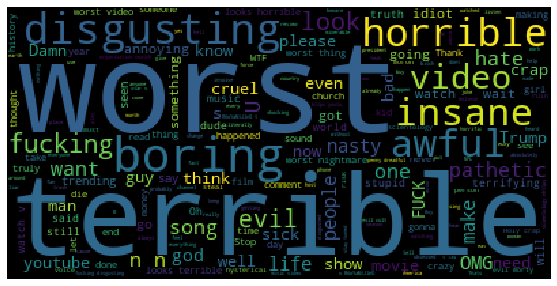

In [22]:
# passing to wordcloud to check all NEGATIVE WORDS
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_negative_comments)
# customizing figure size 
plt.figure(figsize=(20,5))
# showcase wordcloud
plt.imshow(wordcloud)
# disable axis labels
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

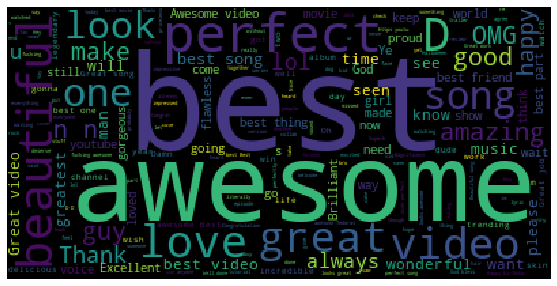

In [23]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize =(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Analysis 3: Emoji Analysis
----------------------------------------------------------------

In [24]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [25]:
import emoji

In [26]:
# filtering emoji from comments and storing
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [27]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [28]:
from collections import Counter

In [29]:
# counting most common emojis
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [30]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [31]:
Counter(emoji_list).most_common(10)[1][0]

'😍'

In [32]:
emojis = [
        Counter(emoji_list).most_common(10)[i][0]
        for i in range(10)
]

In [33]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [34]:
# returns frequency count of emojis
frequency = [
        Counter(emoji_list).most_common(10)[i][1]
        for i in range(10)
]

In [35]:
frequency

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [36]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [37]:
import plotly.graph_objs as go

In [38]:
from plotly.offline import iplot

In [39]:
iplot([go.Bar(x=emojis,y=frequency)])

Analysis 4: Collect Entire Data of Youtube
------------------------------------------------------------------------------------------------

In [40]:
import os

In [98]:
path=r'C:\Users\Lenovo\Desktop\Data Science PortFolio\youtube Case study\additional_data'

In [99]:
# looking all files available in that folder
files=os.listdir(path)

In [100]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [44]:
# prints odd index of those files
for i in range(1,len(files),2):
    print(i)

1
3
5
7
9
11
13
15
17
19


In [45]:
# even index
for i in range(0,len(files),2):
    print(i)

0
2
4
6
8
10
12
14
16
18


In [46]:
# getting all the json files available 
[files[i] for i in range(1,len(files),2)]


['CA_category_id.json',
 'DE_category_id.json',
 'FR_category_id.json',
 'GB_category_id.json',
 'IN_category_id.json',
 'JP_category_id.json',
 'KR_category_id.json',
 'MX_category_id.json',
 'RU_category_id.json',
 'US_category_id.json']

In [47]:
# getting all the csv files available 
files_csv = [files[i] for i in range(0,len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [48]:
# calling our available video dataset and concatenating the country code from our additional data.
full_df = pd.DataFrame()
for file in files_csv: 
   current_df = pd.read_csv(path + '/'+ file, encoding ="iso-8859-1",error_bad_lines=False)
   current_df['country'] = file.split(".")[0][0:2]
   full_df = pd.concat([full_df,current_df])

   full_df.head(4)

In [49]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA


In [50]:
full_df.shape
# here first is total data row, second is total column or attribute

(375942, 17)

Analysis 4: Which Category has maximum likes?
------------------------------------------------------------------------------------------------

In [51]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [91]:
category = pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science PortFolio\youtube Case study/category_file.txt', sep=':')


In [92]:
category.reset_index(inplace=True)

In [93]:
# setting columns
category.columns=['category_id','Category_name']

In [94]:
# setting id as index
category.set_index('category_id', inplace=True)

In [95]:
category

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [96]:
# saving category to a dictionary
dict = category.to_dict()

In [101]:
dict['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [102]:
# map category_name dictionary on category id and store in new attribute as category_name in our existing dataframe
full_df['category_name'] = full_df['category_id'].map(dict['Category_name'])

In [103]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

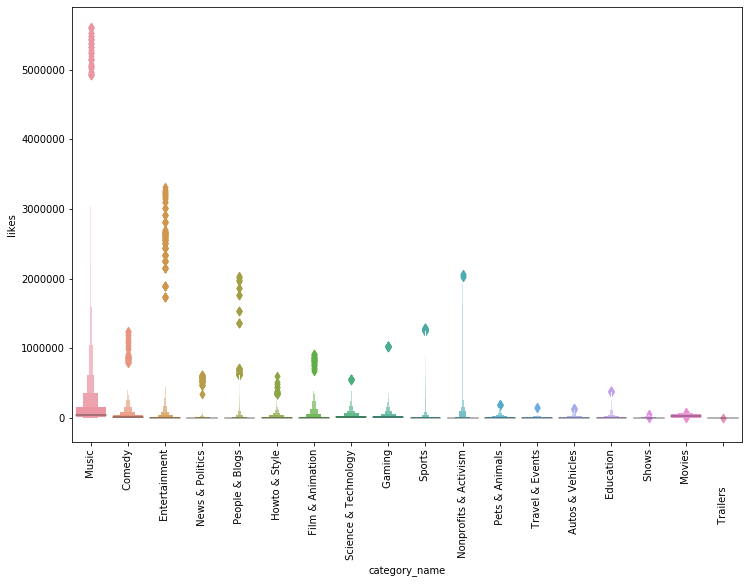

In [104]:
# showing data in boxenplot

plt.figure(figsize =(12,8))
sns.boxenplot(data=full_df, x='category_name', y='likes')
plt.xticks(rotation='vertical')

We can see a lot of people likes 'Music' category.

Analysis 5: Check Wheather audience is engaging or not?
------------------------------------------------------------------------------------------------

In [105]:
# check attribute
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

here we will be evaluating the engagement using 'views', 'likes', 'dislikes', 'comment_count' columns

In [106]:
# check like percentage and saving to dataframe
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
# check dislike percentage and saving to dataframe
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
# check comment percentage and saving to dataframe
full_df['comment_rate'] = (full_df['comment_count']/full_df['views'])*100

In [108]:
full_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

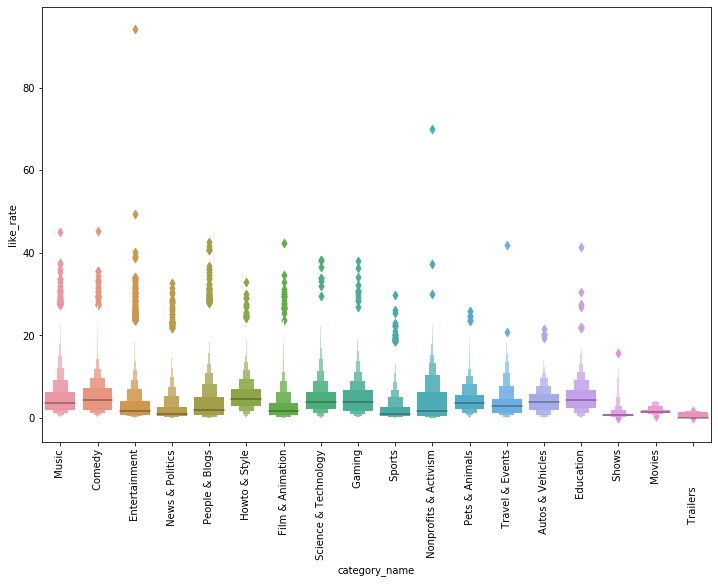

In [109]:
# showing data in boxenplot

plt.figure(figsize =(12,8))
sns.boxenplot(data=full_df, x='category_name', y='like_rate')
plt.xticks(rotation='vertical')

Music, Comedy and Entertainment has most like ratio between all category

Now We check if the likes are affected from views

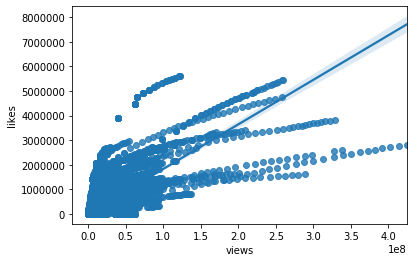

In [110]:
# we are using regressionPlot. we can also use scatterplot
sns.regplot(data=full_df, x="views", y="likes")

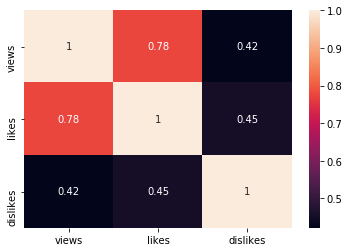

In [112]:
# Finding the correlation between views, likes and dislikes using heatmap
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)

our correlation value between views and likes is 0.78 and with dislikes is 0.42. When views increases dislikes also increases.


Analysis 6: Check Trending videos
------------------------------------------------------------------------------------------------
analysis on which youtube channel produced more trending videos

In [120]:
# returns number of videos per channel in descending order as dataframe with index
channel_df = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})
channel_df

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,MyAvangMusic Com,1
37820,MyBigHairyArse,1
37821,worstplayerever,1
37822,MyDream,1


In [121]:
# import plotly.express
import plotly.express as px

In [123]:
# creating chart with channel dataframe
px.bar(data_frame=channel_df[0:20], x = 'channel_title', y = 'total_videos')

Analysis 7: Check if punctutation in title and tags has any connection with the engagement
------------------------------------------------------------------------------------------------


In [124]:
import string

In [125]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [126]:
# creating a function that prints count of punctuation in a string
def punc_count(x):
   return len([c for c in x if c in string.punctuation])

In [127]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [128]:
# function checking using a string
punc_count('Eminem - Walk On Water (Audio) ft. BeyoncÃ©')

4

In [129]:
sample = full_df[0:10000]

In [130]:
# creating a new attribute for punc count in the title
sample['count_punc'] = sample['title'].apply(punc_count)

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
sample.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1


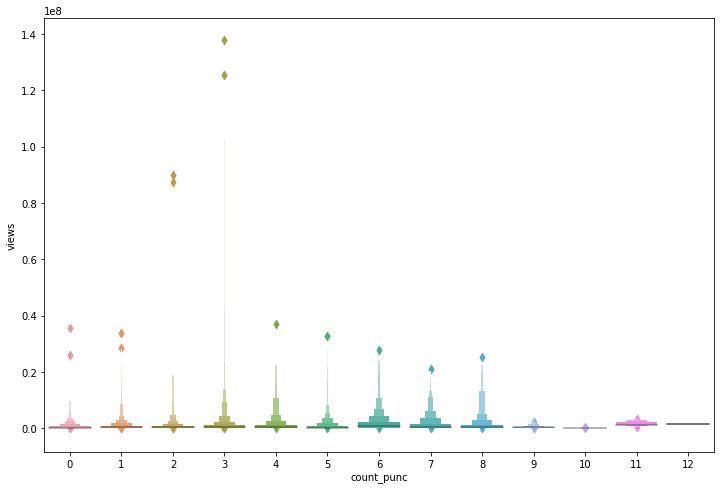

In [133]:
# creating a box plot
plt.figure(figsize=(12,8))
sns.boxenplot(x='count_punc', y='views', data=sample)

In [134]:
# finding correlations between punctuation and views
sample['count_punc'].corr(sample['views'])

0.0651000978304486

There is 7% probability that if total punctuation count increases so views increases.